<a href="https://colab.research.google.com/github/Cirdans-Home/julia-limco/blob/main/LIMCO_Julia_Lezione1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Laboratorio di Introduzione alla Matematica Computazionale - Esercizi in Julia**  
## **Esercitazione 1: successioni**





---
# Setup iniziale
Carichiamo le librerie necessarie.


In [ ]:

using Plots
using Random

gr()  # seleziona il backend grafico GR quando si usa il pacchetto Plots.jl


Plots.GRBackend()


---
# 1. Grafici in Julia

Richiamiamo i comandi per tracciare i grafici. Ricordiamo che in Julia le funzioni applicate alle componendi dei vettori richiedono l'uso del `.` , ad esempio:
`sin.(t)`

Le seguenti istruzioni tracciano il grafico della funzione $\sin(x)$

```
# Grafico di sin(x) nell'intervallo [0,2π]
t = 0:0.01:2π
x = sin.(t)

plot(t, x,
     title="Grafico di sin(t)",
     xlabel="t",
     ylabel="sin(t)",
     label="sin(t)")

```




In [ ]:

t = 0:0.01:2π
x = sin.(t)

plot(t, x,
     title="Grafico di sin(t)",
     xlabel="t",
     ylabel="sin(t)",
     label="sin(t)")


Talvolta e' utile usare la scala logaritmica su un asse cartesiano, oppure su entrambi. Per usare la scala semilogaritmica sull'asse y, nell'argomento di `plot` va aggiunto `yscale=:log10`.

**Esercizio**. Disegnare sia in scala lineare e in scala logaritmica sull'asse y il grafico della funzione $y(x)=3^x$, con $x\in[0,10]$


In [ ]:

x = 0:0.01:10
y = 3 .^ x

plot(x, y, title="Scala lineare", label="3^x")


In [ ]:

plot(x, y,
     yscale=:log10,
     title="Scala semilogaritmica",
     label="3^x")


---
# 2. Successione di Collatz

Sia $n$ un intero positivo. La *successione di Collatz* di valore iniziale $n$ \`e la successione di interi positivi $\{a_k\}_{k\geq 1}$ definita nel modo seguente:
\begin{eqnarray*}
&&a_1=n,\\
&&{\rm per }\,\, k\geq 1,\quad a_{k+1}=\left\{
\begin{array}{ll}\frac{a_k}{2}&{\rm se }\,\, a_k\,\, {\rm \grave{e}}\,\,{\rm pari}, \\
3a_k+1 & {\rm se }\,\, a_k\,\, {\rm \grave{e}}\,\,{\rm dispari}.\end{array}\right.
\end{eqnarray*}
La *congettura di Collatz* dice che, per qualsiasi $n$, esiste sempre un indice $h$ tale che $a_h=1$.

Ecco un esempio di successione di Collatz:
$$
3\quad 10\quad 5\quad 16\quad 8\quad 4\quad 2\quad 1\quad \ldots
$$


**Esercizio.** Scrivere una function  `collatz(n)` che prenda in input un intero positivo  `n` e restituisca in output il vettore  `a` contenente i primi $h$ elementi della successione di Collatz di valore iniziale  `n`. Qui $h$ indica il piu' piccolo indice tale che $a_h=1$.


In [ ]:

function collatz(n::Int)
    a = [n]
    while a[end] != 1
        if iseven(a[end])
            push!(a, a[end] / 2)
        else
            push!(a, 3a[end] + 1)
        end
    end
    return a
end


collatz (generic function with 1 method)

Possiamo rappresentare graficamente la successione dell'esempio con i comandi seguenti:

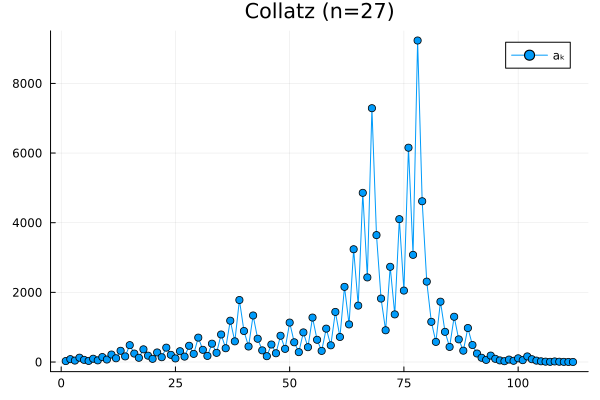

In [ ]:

a = collatz(27)
plot(a, marker=:circle, title="Collatz (n=27)", label="aₖ")



Provate a calcolare e visualizzare altri esempi di successioni di Collatz, per vari valori di $n$.

E' interessante studiare, al variare di $n$, dopo quante iterazioni viene raggiunto per la prima volta il valore 1.

**Esercizio**: Scrivere una function `collatz_count(m)` che prenda in input un intero positivo  `m` e restituisca in output il vettore  `u` di lunghezza `m`, tale che `u[j]` e' il numero di elementi del vettore a restituito in output dalla function `collatz(j)`, dove l'indice `j` prende i valori da `1` a `m`.


In [ ]:

function collatz_count(m::Int)
    u = zeros(Int, m)
    for j in 1:m
        u[j] = length(collatz(j))
    end
    return u
end



collatz_count (generic function with 1 method)

Provate a rappresentare  u con un grafico a barre. Per esempio, i comandi seguenti

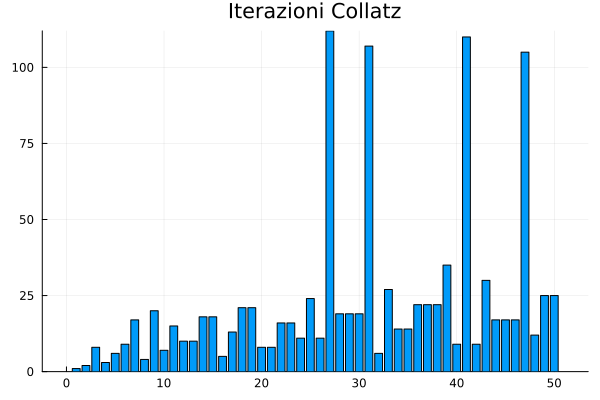

In [ ]:
u = collatz_count(50)
bar(u, title="Iterazioni Collatz", label="")


---
# 3. Successione di Fibonacci

La *successione di Fibonacci* $\{f_n\}_{n\geq 1}$ \`e definita come
\begin{eqnarray*}
&& f_1=1,\\
&& f_2=1,\\
&& f_n=f_{n-1}+f_{n-2}\,\,{\rm per}\,\, n\geq 3.
\end{eqnarray*}
I primi termini della successione sono
$$
1,\quad 1,\quad 2,\quad 3,\quad 5,\quad 8,\quad 13,\quad 21,\quad 34,\quad 55,\quad 89,\quad 144, \ldots
$$

**Esercizio.**
Scrivere una function `fibonacci(m)` che prende in input il numero intero positivo  m e restituisce in output il vettore  f che contiene i primi  m elementi della successione di Fibonacci.


In [ ]:

function fibonacci(m::Int)
    f = zeros(Float64, m)
    f[1] = 1
    f[2] = 1
    for n in 3:m
        f[n] = f[n-1] + f[n-2]
    end
    return f
end


fibonacci (generic function with 1 method)

Usando la function fibonacci, si disegni il grafico dei primi 50 numeri di Fibonacci.

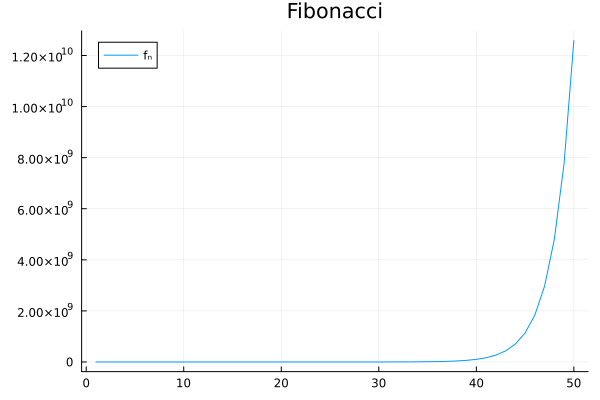

In [ ]:

m = 50
f = fibonacci(m)

plot(f, title="Fibonacci", label="fₙ")


**Alcune misteriose coincidenze.**


Scegliete $m$ abbastanza grande (ma non troppo per evitare overflow (per esempio $m=50$), costruite la successione dei primi $m$ numeri di Fibonacci e costruite il vettore r di lunghezza $m-1$ i cui elementi sono i rapporti consecutivi $f_k/f_{k-1}$, per $k=2,3,\ldots,m$. Rappresentate graficamente questo vettore. Qual e' il suo andamento?


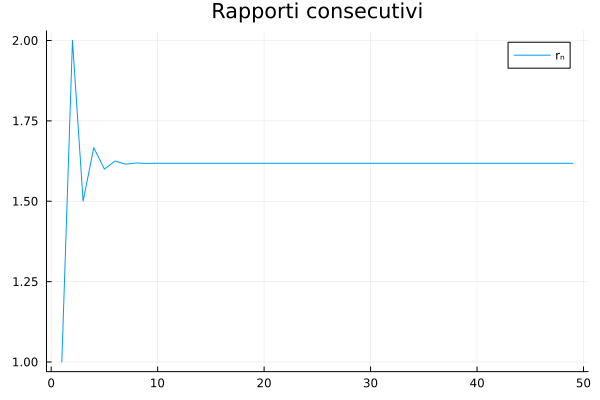

In [ ]:

r = [f[k]/f[k-1] for k in 2:m]

plot(r, title="Rapporti consecutivi", label="rₙ")


Graficamente si vede che gli elementi di  `r` tendono verso un limite, che numericamente possiamo approssimare con `r[end]`.

In [ ]:
r[end]

1.618033988749895

Ora scegliamo un numero reale positivo $x$, per esempio $x=10$, e a partire da questo valore iteriamo l'operazione $x\leftarrow\sqrt{1+x}$. In altre parole, definiamo

$x=10$

ed eseguiamo ``tante'' volte (per esempio 15 volte) l'istruzione

x = sqrt(1+x)

A quale numero tende questa iterazione? Confrontate l'ultima iterata con r[end].


Il comando {\tt roots} calcola numericamente le radici di un polinomio, espresso come un vettore di coefficienti. Usate {\tt help roots} per capirne meglio il funzionamento.

\noindent Ora diamo il comando


Il comando `roots` calcola numericamente le radici di un polinomio, espresso come un vettore di coefficienti.
Per calcolare gli zeri del polinomio aggiungiamo prima il pacchetto `Polynomials`

In [ ]:
using Pkg
Pkg.add("Polynomials")

using Polynomials

e poi diamo i comandi:

In [ ]:
z = roots(Polynomial([-1, -1, 1]))

q = maximum(z) #selezioniamo la radice positiva

1.618033988749895

Che legame c'\`e tra il vettore [1 -1 -1], la funzione $g(x)=\sqrt{x+1}$ e i numeri di Fibonacci?

Disegnate in scala semilogaritmica nella stessa figura i primi $m$ termini della successione di Fibonacci e i primi $m$ termini della successione $\{q^n\}_n$. Cosa si osserva?

In [ ]:
# inserire qui il codice

Perch\'e i grafici delle due successioni sono due rette, e perch\'e queste rette sono parallele?

**Esercizio**
Si consideri la successione $\{g_n\}_{n\geq 1}$ definita come segue:
\begin{eqnarray*}
&& g_1=1,\,\, g_2=1,\,\, g_3=2,\\
&& g_n=g_{n-1}+g_{n-3}\,\,{\rm per}\,\, n\geq 4.
\end{eqnarray*}
Procedendo come per la successione di Fibonacci, si determini $\rho$ tale che $g_n\approx K\rho^n$ e si disegni un grafico che metta a confronto l'andamento di $g_n$ e quello di $\rho^n$.

In [ ]:
# inserire qui il codice


---
# 4. Successione di Fibonacci randomizzata

La *successione di Fibonacci randomizzata* e' definita come
\begin{eqnarray*}
&& f_1=1,\\
&& f_2=1,\\
&& f_n=f_{n-1}+p_n f_{n-2}\,\,{\rm per}\,\, n\geq 3,
\end{eqnarray*}
dove $p_n$ vale $1$ con probabilita, $1/2$ e $-1$ con probabilita' $1/2$.

E' stato dimostrato nell'articolo

D. Viswanath, *Random Fibonacci sequences and the number $c=1.13198824$*, Math. Comp. 69:1131--1155, 2000.

che, con probabilita' 1, il limite
$$
\lim_{n\rightarrow\infty}|f_n|^{1/n}
$$
esiste finito ed e' uguale ad una costante $c$ le cui prime cifre decimali sono date da $c=1.13198824...$. In altre parole, si ha che quasi certamente la successione cresce in valore assoluto come $c^n$.

**Esercizio**
Scrivere una function  rfibonacci(m) che prenda in input un intero positivo  m e restituisca il vettore rf contenente i primi m elementi della successione di Fibonacci randomizzata (nota:  rand() ) restituisce un numero pseudocasuale tra 0 e 1). Usare poi la function per visualizzare graficamente la proprieta' di crescita esponenziale descritta sopra, rappresentando in scala semilogaritmica il grafico della successione di Fibonacci randomizzata (in valore assoluto) e quello di $c^n$.


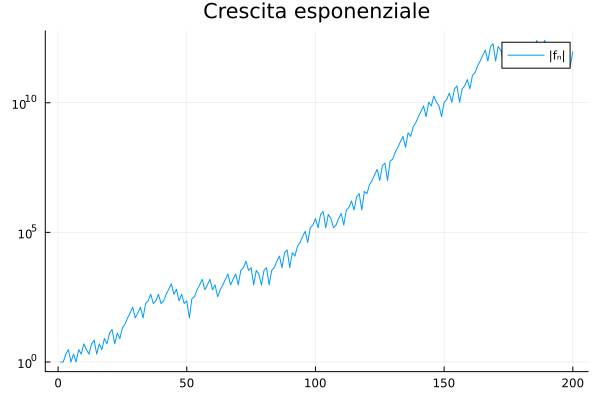

In [ ]:

function rfibonacci(m)
    rf = zeros(Float64, m)
    rf[1]=1
    rf[2]=1
    for n in 3:m
        p = rand() < 0.5 ? 1 : -1
        rf[n] = rf[n-1] + p*rf[n-2]
    end
    return rf
end

m = 200
rf = rfibonacci(m)

plot(abs.(rf),
     yscale=:log10,
     title="Crescita esponenziale",
     label="|fₙ|")


Una generalizzazione della successione di Fibonacci randomizzata si pu\`o formulare come segue:
\begin{eqnarray*}
&& x_1=1,\\
&& x_2=1,\\
&& x_n=x_{n-1}+p_n\beta x_{n-2}\,\,{\rm per}\,\, n\geq 3,
\end{eqnarray*}
dove $\beta$ \`e un numero reale positivo fissato e $p_n$ \`e definito come sopra. Anche per questa successione \`e stata osservata nell'articolo

M. Embree, L. N. Trefethen, *Growth and decay of random Fibonacci sequences*, Proc. R. Soc. Lond. A 455: 2471--2485 (1999).

 una crescita esponenziale, il cui tasso di crescita \`e indicato con $\sigma(\beta)$. Inoltre, si ha $\sigma(\beta)<1$ se $0<\beta<\beta^*$ e $\sigma(\beta)>1$ se $\beta>\beta^*$,  dove $\beta^*=0.70258...$ \`e una costante nota come {\em costante di Embree-Trefethen}.

**Esercizio**
Si verifichi sperimentalmente la propriet\`a di crescita esponenziale della successione $\{x_n\}_{n\geq 1}$. \`E interessante fare questo esperimento con vari valori di $\beta$: provate a scegliere $\beta<\beta^*$, poi $\beta>\beta^*$ e infine $\beta=\beta^*$.


In [ ]:
# inserire qui il codice


---
# 5.  Approssimazione di π

Si consideri la successione di interi positivi $\{k_n\}_{n\geq 1}$ definita come segue. Per $n\geq 1$ si consideri nel piano cartesiano il cerchio $\mathcal{C}_n$ di centro l'origine degli assi e di raggio $\sqrt{n}$, e si ponga $k_n$ uguale al numero di punti di coordinate intere che appartengono a $\mathcal{C}_n$. La figura qui sotto illustra il caso $n=3$, in cui si ha $k_3=9$.

**Esercizio**
Scrivere una function `pigreco(m)` che prende in input un intero positivo `m` e restituisce il vettore `k` contenente i primi `m` elementi della successione definita sopra.



In [ ]:

function pigreco(m)
    k = zeros(Int, m)
    for n in 1:m
        count = 0
        r = floor(Int, sqrt(n))
        for x in -r:r
            for y in -r:r
                if x^2 + y^2 <= n
                    count += 1
                end
            end
        end
        k[n] = count
    end
    return k
end

m = 300
k = pigreco(m)
khat = k ./ (1:m)

plot(abs.(khat .- π),
     yscale=:log10,
     title="Errore approssimazione π",
     label="errore")


Vogliamo ora modificare la successione $\{k_n\}_{n\geq 1}$ in modo da definire una nuova successione $\{\hat{k}_n\}_{n\geq 1}$
che approssimi $\pi$. Come possiamo procedere? (Suggerimento: si osservi che $k_n$ \`e l'area della figura formata dall'unione di tutti i quadratini di lato 1 e centro nei punti del piano di coordinate intere appartenenti a $\mathcal{C}_n$. \`E ragionevole aspettarsi che $\{k_n\}_{n\geq 1}$ approssimi l'area di $\mathcal{C}_n$. Per quale numero occorrer\`a dividere $k_n$ affinch\'e la nuova successione approssimi $\pi$?).

Si applichi la function con  `m` abbastanza grande, si esegua un'opportuna operazione su  `k` per ottenere il vettore {\tt k\_hat} dei primi {\tt m} elementi di $\{\hat{k}_n\}_{n\geq 1}$, e si tracci un grafico semilogaritmico dell'errore con cui la successione approssima $\pi$.